<h4 align="right">by <a href="http://cse.iitkgp.ac.in/~adas/">Abir Das</a> with help of <br> Ram Rakesh and Ankit Singh<br> </h4>

### Write the following details here
** Name: ** `<Rajat Singh>`<br/>
** Roll Number: ** `<>`<br/>
** Department: ** `<Industrial and Systems>`<br/>
** Email: ** 

# Problem Set 2

## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file ([`assignment_01.ipynb`]()) to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

### Problem: You will implement a fully connected neural network from scratch in this problem
We marked places where you are expected to add/change your own code with **`##### write your code below #####`** comment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
'''You are not supposed to import any other python library to work on this assignments.'''

'You are not supposed to import any other python library to work on this assignments.'

In [2]:
'''data is loaded from data directory.
please don't remove the folder '''

x_train = np.load('./data/X_train.npy')
x_train = x_train.flatten().reshape(-1,28*28)
x_train = x_train / 255.0
gt_indices = np.load('./data/y_train.npy')
train_length = len(x_train)
print("Number of training examples: {:d}".format(train_length))

Number of training examples: 60000


In [3]:
'''Dimensions to be used for creating your model'''

batch_size = 64  # batch size
input_dim = 784  # input dimension
hidden_1_dim = 512  # hidden layer 1 dimension
hidden_2_dim = 256  # hidden layer 2 dimension
output_dim = 10   # output dimension

'''Other hyperparameters'''
learning_rate = 1e-5

In [4]:
#creating one hot vector representation of output classification
y_train = np.zeros((train_length, output_dim))
# print(y.shape, gt_indices.shape)
for i in range(train_length):
    y_train[i,gt_indices[i]] = 1

# Number of mini-batches (as integer) in one epoch
num_minibatches = np.floor(train_length/batch_size).astype(int) 

In [5]:
print("No of mini-batches {:d} and total training data used in training:\
{}.".format(num_minibatches, num_minibatches*batch_size))

No of mini-batches 937 and total training data used in training:59968.


In [6]:
'''Randomly Initialize Weights  from standard normal distribution (i.e., mean = 0 and s.d. = 1.0).
Use the dimesnions specified in the cell 3 to initialize your weights matrices. 
Use the nomenclature W1,W2 etc. (provided below) for the different weight matrices.'''

########################## write your code below ##############################################
mu, sigma = 0.0, 1.0
W1= np.random.normal(mu, sigma, size=(784, 512))
W2 = np.random.normal(mu, sigma, size=(512, 256))
W3 = np.random.normal(mu, sigma, size=(256, 10))
###############################################################################################

In [7]:
# Write a function which computes the softmax where X is vector of scores computed during forward pass
def softmax(x):  #stable_softmax
    ##############################write your code here #################################
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return np.divide(e_x, np.sum(e_x, axis = 1, keepdims=True))
    ####################################################################################

 Epoch: 0, iteration: 0, Loss: 16.6937 
 Epoch: 1, iteration: 937, Loss: 2.5603 
 Epoch: 2, iteration: 1874, Loss: 1.7269 
 Epoch: 3, iteration: 2811, Loss: 1.1513 
 Epoch: 4, iteration: 3748, Loss: 1.1513 
 Epoch: 5, iteration: 4685, Loss: 0.8635 
 Epoch: 6, iteration: 5622, Loss: 0.2900 
 Epoch: 7, iteration: 6559, Loss: 0.2878 
 Epoch: 8, iteration: 7496, Loss: 0.2878 
 Epoch: 9, iteration: 8433, Loss: 0.2878 
 Epoch: 10, iteration: 9370, Loss: 0.2878 
 Epoch: 11, iteration: 10307, Loss: 0.2878 
 Epoch: 12, iteration: 11244, Loss: 0.2878 
 Epoch: 13, iteration: 12181, Loss: 0.2878 
 Epoch: 14, iteration: 13118, Loss: 0.2878 
 Epoch: 15, iteration: 14055, Loss: 0.2878 
 Epoch: 16, iteration: 14992, Loss: 0.2878 
 Epoch: 17, iteration: 15929, Loss: 0.2878 
 Epoch: 18, iteration: 16866, Loss: 0.2878 
 Epoch: 19, iteration: 17803, Loss: 0.2878 
 Epoch: 20, iteration: 18740, Loss: 0.2878 
 Epoch: 21, iteration: 19677, Loss: 0.2878 


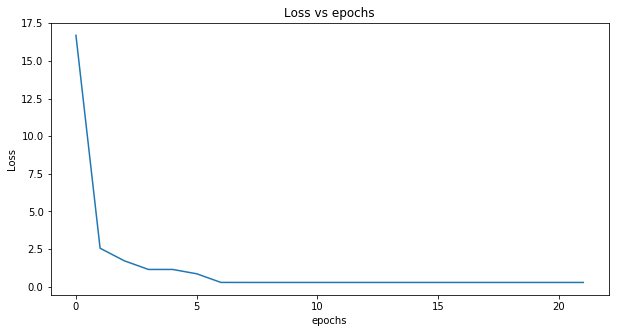

In [8]:
no_of_iterations = 20000
loss_list=[]
i_epoch = 0
for i_iter in range(no_of_iterations):
    
    ''''''
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]
    y_batchinput = y_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]
    
    ########################## write your code below ##############################################
    ######################### Forward Pass Block #####################################
    '''Write the code for forward block of the neural network with 2 hidden layers.
    Please stick to the notation below which follows the notation provided in the lecture slides.
    Note that you are allowed to write the right hand sides of these variables in more than
    one line if that is convenient for you.'''
    
    # first hidden layer implementation
    a1 = np.dot(x_batchinput, W1)
    # implement Relu layer
    h1 = np.maximum(a1, 0) 
    #  implement 2 hidden layer
    a2 = np.dot(h1, W2)
    # implement Relu activation 
    h2 = np.maximum(a2, 0)
    #implement linear output layer
    a3 = np.dot(h2, W3)
    # softmax layer
    softmax_score = softmax(a3) #enusre you have implemented the softmax function defined above
    ##################################################################################
    ###############################################################################################
    neg_log_softmax_score = -np.log(softmax_score+0.00000001) # The small number is added to avoid 0 input to log function
    
    # Compute and print loss
    if i_iter%num_minibatches == 0:
        loss = np.mean(np.diag(np.take(neg_log_softmax_score, gt_indices[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size],\
                                       axis=1)))
        print(" Epoch: {:d}, iteration: {:d}, Loss: {:6.4f} ".format(i_epoch, i_iter, loss))
        loss_list.append(loss)
        i_epoch += 1
        # Each 10th epoch reduce learning rate by a factor of 10
        if i_epoch%10 == 0:
            learning_rate /= 10.0
     
    ################################### Backpropagation Code Block #####################################
    ''' Use the convention grad_{} for computing the gradients.
    for e.g 
        grad_W1 for gradients w.r.t. weight W1
        grad_w2 for gradients w.r.t. weights W2'''
    ########################## write your code below ##############################################
    # Gradient of cross-entropy loss w.r.t. preactivation of the output layer
    grad_softmax_score = softmax_score - y_batchinput
    
    # gradient w.r.t W3
    grad_W3 = np.dot(h2.T, grad_softmax_score) 
    # gradient w.r.t h2
    grad_h2 = np.dot(grad_softmax_score, W3.T)
    # gradient w.r.t a2
    grad_a2 = grad_h2*((a2>0).astype(int))
    # gradient w.r.t W2
    grad_W2 = np.dot(h1.T, grad_a2) 
    # gradient w.r.t h1
    grad_h1 = np.dot(grad_a2, W2.T)
    # gradient w.r.t a1
    grad_a1 = grad_h1*((a1>0).astype(int))
    # gradient w.r.t W1
    grad_W1 = np.dot(x_batchinput.T, grad_a1) 
    ###############################################################################################
    ####################################################################################################
    
    
    ################################ Update Weights Block using SGD ####################################
    W3 -= learning_rate * grad_W3
    W2 -= learning_rate * grad_W2
    W1 -= learning_rate * grad_W1
    ####################################################################################################
    
#plotting the loss
plt.figure(figsize=(10,5))
plt.plot(loss_list)
plt.title('Loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [9]:
'''Loading the test data from data/X_test.npy and data/y_test.npy.'''
x_test = np.load('./data/X_test.npy')
x_test = x_test.flatten().reshape(-1,28*28)
x_test = x_test / 255.0
y_test = np.load('./data/y_test.npy')

In [10]:
batch_size_test = 100 # Deliberately taken 100 so that it divides the test data size
num_minibatches = len(y_test)/batch_size_test
test_correct = 0

'''Only forward block code and compute softmax_score .'''
for i_iter in range(int(num_minibatches)):
    
    '''Get one minibatch'''
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    ######### copy only the forward pass block of your code and pass the x_batchinput to it and compute softmax_score ##########
    # first hidden layer implementation
    a1 = np.dot(x_batchinput, W1)
    # implement Relu layer
    h1 =  np.maximum(a1, 0) 
    #  implement 2nd hidden layer
    a2 = np.dot(h1, W2)
    # implement Relu activation 
    h2 = np.maximum(a2, 0)
    #implement linear output layer
    a3 = np.dot(h2, W3)
    # softmax layer
    softmax_score = softmax(a3) #enusre you have implemented the softmax function defined above
    ##################################################################################
    
    y_batchinput = y_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    y_pred = np.argmax(softmax_score, axis=1)
    num_correct_i_iter = np.sum(y_pred == y_batchinput)
    test_correct += num_correct_i_iter
print ("Test accuracy is {:4.2f} %".format(test_correct/len(y_test)*100))

Test accuracy is 91.16 %
